In [166]:
import numpy as np
from qiskit import QuantumCircuit

In [167]:
# Create a Quantum Circuit acting on a quantum register of three qubits
# circ = QuantumCircuit(2)

In [168]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(2)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.initialize([1, 0], 0)
circ.h(1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.ry(np.pi/2, 0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
# circ.cx(0, 2)
circ.crx(np.pi/2, 0, 1)
circ.rx(np.pi/2, 0)
circ.rz(np.pi/2, 1)
circ.crx(np.pi/2, 0, 1)
circ.initialize([1, 0], 0)

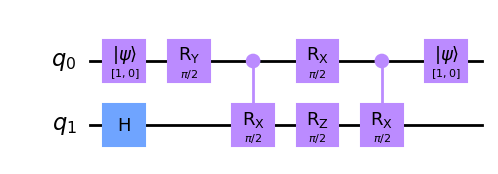

In [169]:
circ.draw('mpl')

In [170]:
# from qiskit.quantum_info import Operator

# U = Operator(circ)

# # Show the results
# U.data

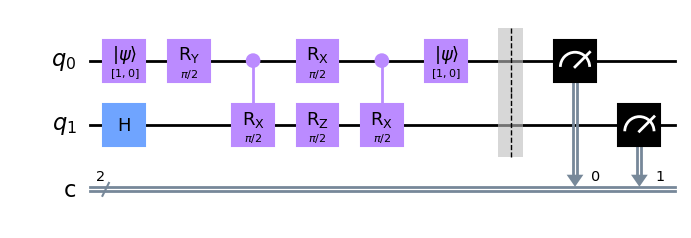

In [171]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(2), front=True)

#drawing the circuit
qc.draw('mpl')

In [172]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [173]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'00': 942, '10': 82}
